# Logistic regression for Text Classification

#### Importing required librabries 

In [41]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
nltk.download("stopwords")
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TASK 1.1 - Load the data set 

In [42]:
moviedir = 'C:\\Users\\HP\\Desktop\\NIIT Learning\\movie_reviews'
movie_data= load_files(moviedir, shuffle = True) 

print("Total number of instances : ", len(movie_data.data))
print("Target names : ", movie_data.target_names)

Total number of instances :  2000
Target names :  ['neg', 'pos']


### Task 1.2 - Split the data set into train and test data

In [43]:
# Split data into training and test sets

reviews_train, reviews_test, y_train, y_test = train_test_split(
    movie_data.data, movie_data.target, test_size = 0.20, random_state = 12)

print("Train size of Review data is ", len(reviews_train))
print("Test size of Review data is ", len(reviews_test))

Train size of Review data is  1600
Test size of Review data is  400


### Task 1.3 - Vectorize training data using Tfidf Vectorizer
### TASK 1.4 - Vectorize the test data using same technique

In [71]:
Vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)

X_train = Vectorizer.fit_transform(reviews_train)
X_test = Vectorizer.transform(reviews_test)

print("Train size : ", X_train.shape)
print("Test size : ", X_test.shape)

Train size :  (1600, 35734)
Test size :  (400, 35734)


### TASK 2.1 - Apply Logistic Regression with L2 regularisation

In [51]:
#using logistic regression with L2 regularisation
start_train = time.time()
regularized_lr=LogisticRegression(penalty='l2', C=1.0)
regularized_lr.fit(X_train,y_train)
stop_train = time.time()

start_test = time.time()
reg_pred=regularized_lr.predict(X_test)
stop_test = time.time()

### Task 3.1 - Evaluate the model using F1 score, train and test time

In [75]:
print("F1 Score : ", f1_score(y_test, reg_pred))
print("Training time : ", (stop_train-start_train),"sec")
print("Testing time : ", stop_test-start_test, "sec")

F1 Score :  0.8320802005012532
Training time :  0.3008255958557129 sec
Testing time :  0.0020024776458740234 sec


### Task 3.2 - Plot all the results obtained from f1 scores, diplaying training and test timing.

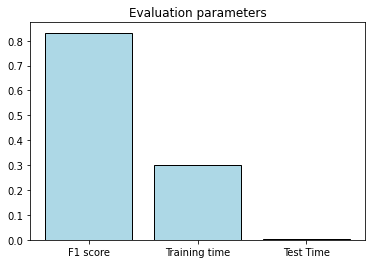

In [97]:
r=np.arange(3)
plt.bar(r, [f1_score(y_test, reg_pred), (stop_train-start_train),stop_test-start_test], edgecolor= "black", color="lightblue")
plt.xticks(r,["F1 score","Training time", "Test Time"])
plt.title("Evaluation parameters")
plt.show()

In [110]:
#creating dataframe of reviews and predicted class
df=pd.DataFrame(list(zip(reviews_test, reg_pred)), columns=["Reviews","Prediction"])
df["Prediction"]= df["Prediction"].replace((0,1),("Neg", "Pos"))
df.head(10)

,Reviews,Prediction
0,"b' "" desperate measures "" was something i was ...",Neg
1,"b""an affluent horse breeder's past comes up to...",Neg
2,"b'i like movies with albert brooks , and i rea...",Pos
3,"b""i think we should , as responsible citizens ...",Neg
4,b'with a team of 200 graphic artists and anima...,Pos
5,b'america\'s favorite homicidal plaything take...,Neg
6,"b'seen september 13 , 1998 at 4 p . m at rotte...",Pos
7,b'i had been looking forward to this film sinc...,Neg
8,b'synopsis : a small town **** convinces a dim...,Neg
9,"b'of circumcision , psychic wounds and the fam...",Pos


### CONCLUSION : The logistic text classification model is getting the accuracy of 83%, so it can be use to predict the classification of text reviews as negative and positive.